In [2]:
import fiftyone as fo


In [3]:
dataset = fo.zoo.load_zoo_dataset(
              "open-images-v7",
              split="train",
              label_types=["detections"],
              classes=["Cat"],
            #   max_samples=10,
          )

Necessary images already downloaded
Existing download of split 'train' is sufficient
Loading existing dataset 'open-images-v7-train'. To reload from disk, either delete the existing dataset or provide a custom `dataset_name` to use


In [13]:
for i, sample in enumerate(dataset[:10]):
    # print(i, sample['ground_truth']['detections'][0]['bounding_box'])
    print(sample['ground_truth'])

<Detections: {
    'detections': [
        <Detection: {
            'id': '674de97ff05d93d60f717879',
            'attributes': {},
            'tags': [],
            'label': 'Cat',
            'bounding_box': [0.019608, 0.02451, 0.978758, 0.952614],
            'mask': None,
            'confidence': None,
            'index': None,
            'IsOccluded': True,
            'IsTruncated': True,
            'IsGroupOf': False,
            'IsDepiction': False,
            'IsInside': False,
        }>,
    ],
}>
<Detections: {
    'detections': [
        <Detection: {
            'id': '674de97ff05d93d60f71787b',
            'attributes': {},
            'tags': [],
            'label': 'Cat',
            'bounding_box': [0.003125, 0.0075, 0.99625, 0.9916670000000001],
            'mask': None,
            'confidence': None,
            'index': None,
            'IsOccluded': False,
            'IsTruncated': True,
            'IsGroupOf': False,
            'IsDepiction': False

In [5]:
# image plotter taken from assignment 3
from sklearn import datasets
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline
import matplotlib.pyplot as plt

def plot_images(data):
    num_plots = data.shape[0] if (type(data) is np.array) else len(data)
    fig = plt.figure(figsize=(num_plots, 10.*num_plots))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, num_plots), axes_pad=0.1)
    for i in range(num_plots):
        grid[i].imshow(data[i])
    plt.show()

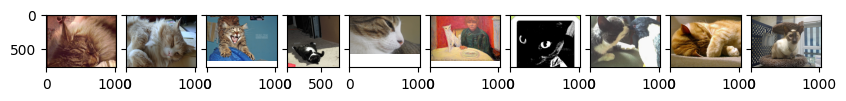

In [ ]:
import cv2
import numpy as np

# NOTE: we don't reorganize the channels in the actual neural network. (there's no reason to)

n_samples = 10
images = []
# images = np.empty(n_samples)
for i, sample in enumerate(dataset[:n_samples]):
    img = cv2.imread(sample['filepath'])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)
plot_images(images)

In [11]:
# find smallest image to standardize image size.

minx, miny = -1, -1
for i, sample in enumerate(dataset):
    # print(sample)
    x, y, _ = cv2.imread(sample['filepath']).shape
    if x < minx or minx == -1:
        print("x",i)
        minx = x
    if y < miny or miny == -1:
        print("y",i)
        miny = y

print(minx, miny)

x 0
y 0
x 1
x 2
y 3
x 4
y 15
x 18
y 58
x 60
y 327
x 459
y 595
y 1885
x 2682
y 3121
x 3352
y 5238
x 9053
x 10096
x 10543
267 326
